# TP2

In [3]:
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from statistics import mean

In [4]:
# Il s'agit d'une fonction qui permet de choisir k point de X de manière aléatoire
def random_choice(k,X):
    krandom=[]
    for i in range(k):
        krandom.append(random.choice(X))
    
    return krandom

(1000, 2)


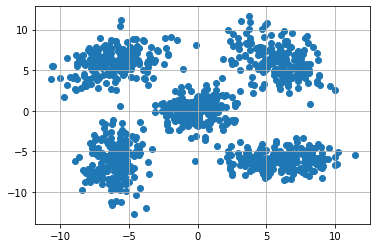

In [5]:
X1 = np.loadtxt("data1.txt")
print(X1.shape)
plt.scatter(X1[:,0], X1[:,1])
plt.grid(True)
plt.show()

# On constate que le jeu de données 1 est linéairement séparable

(1000, 2)


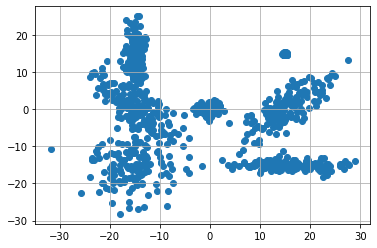

In [6]:
X2 = np.loadtxt("data2.txt")
print(X2.shape)
plt.scatter(X2[:,0], X2[:,1])
plt.grid(True)
plt.show()

# On constate que le jeu de données 2 est difficilement linéairement séparable

(1000, 2)


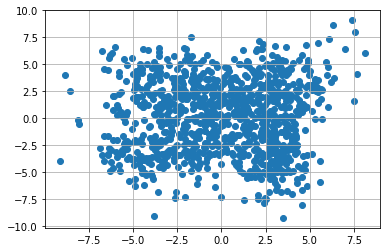

In [8]:
X3 = np.loadtxt("data3.txt")
print(X3.shape)
plt.scatter(X3[:,0], X3[:,1])
plt.grid(True)
plt.show()

# On constate que le jeu de données 2 est linéairement inséparable

In [9]:
# Il s'agit d'une fonction qui permet de tracer les différents clusters avec un jeu de couleurs
def plot(df):
    #, 5: '4'
    #markers = {1: '+', 2: 'x', 3: '*', 4: '1'}
    #, 5: 'darkorange'
    colors = {1: 'pink', 2: 'yellowgreen', 3: 'deepskyblue', 4: 'mediumblue', 5: 'darkorange'}
    plt.figure(1)
    #for kind in markers:
    #d = df[df.cluster==kind]
    plt.scatter(df.loc[:,0], df.loc[:,1], 
                c = df['cluster'].map(colors))
    #,marker = markers[kind],label=kind
    plt.legend()
    plt.show()

In [11]:
#Calcul de la distance euclidienne
def distance_euclidienne(X, mean):
    return ((X-mean).T)@(X-mean)

In [12]:
#Calcul des moyennes des différentes classes
def moyenne(df,k):
    moyenne=np.zeros((k,2))
    for i in range(k):
        print(df[df.cluster==i+1].loc[:,0].mean())
        moyenne[i,0] = df[df.cluster==i+1].loc[:,0].mean()
        moyenne[i,1] = df[df.cluster==i+1].loc[:,1].mean()
    return moyenne

In [20]:
# La fonction kmeans défini from scratch
def kmeans(k,fichier):
    X = np.loadtxt(fichier)
    list_centroide=random_choice(k,X)
    df = pd.read_csv(fichier, sep=" ",header=None)
    df=df.assign(cluster="")
    centroides=[]
    dernierelist_centroide=[]
    list_centroideN = np.zeros((k,2))
    
    for i in range(k):
        pointC=np.zeros((2,1))
        pointC[0,0]=list_centroide[i][0]
        pointC[1,0]=list_centroide[i][1]
        centroides.append(pointC)
        
    
    condition_arret=1
    iter=0
    while  condition_arret>0.0001 and iter<100:
        
        distancescentroides=[]
        for j in df.index:
            distances=[]
            pointX=np.zeros((2,1))
            pointX[0,0]=df.iloc[j,0]
            pointX[1,0]=df.iloc[j,1]
            for l in range(k):
                if iter!=0:
                    pointC=np.zeros((2,1))
                    pointC[0,0]=list_centroideN[l,0]
                    pointC[1,0]=list_centroideN[l,1]
                    centroides[l]=pointC
                distances.append(abs(distance_euclidienne(pointX,centroides[l])[0][0]))
            #print("distances:{}".format(distances))
            indexmin=distances.index(min(distances))
            #print(indexmin)
            df.iloc[j,2]=indexmin+1
        #print(df)
        plot(df)
        moy=moyenne(df,k)
        for i in range(k):
            for j in range(2):
                list_centroideN[i,j]=moy[i,j]
            #print("centroides[i] :{} ".format(centroides[i]))
            #print("centroides[i].T :{} ".format(centroides[i].T))
            #print("list_centroideN[i,:].T :{} ".format(list_centroideN[i,:].T))
            #print("list_centroideN[i,:] :{} ".format(list_centroideN[i,:]))
            pointC=np.zeros((2,1))
            pointC[0,0]=list_centroideN[i,0]
            pointC[1,0]=list_centroideN[i,1]
            #print("pointC :{} ".format(pointC))
            #print(abs(distance_euclidienne(pointC,centroides[i])))
            #print(abs(distance_euclidienne(pointC,centroides[i]))[0][0])
            distancescentroides.append(abs(distance_euclidienne(pointC,centroides[i]))[0][0])
        print("distance centroides {}".format(distancescentroides))
        condition_arret=mean(distancescentroides)
        iter=iter+1
    return df

No handles with labels found to put in legend.


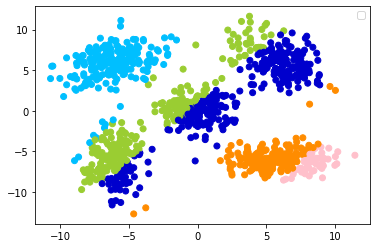

8.435151836734695
-3.1868706839999983
-6.203155882926825
2.2800414269005858
5.147999922077923
distance centroides [0.3308909113687615, 12.894114348982082, 1.3275072134545096, 2.887635182448699, 1.81610060917405]


No handles with labels found to put in legend.


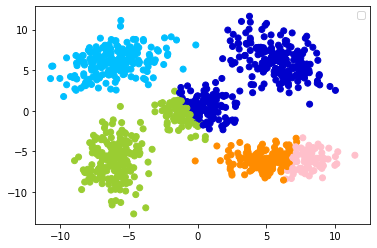

8.158916260869567
-4.688840489361707
-6.065821060301503
3.9465018401253866
4.770809687022902
distance centroides [0.22107613724019148, 12.570543183369422, 0.18999696127784035, 11.081936153711048, 0.17196802228446903]


No handles with labels found to put in legend.


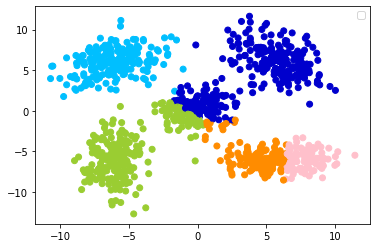

7.934842780487807
-4.694271956989252
-6.0735664824120565
3.972638631067956
4.256970458015269
distance centroides [0.07843007313629088, 0.013797389272517589, 0.0008779041372225363, 0.07744273350101828, 0.3835501211894903]


No handles with labels found to put in legend.


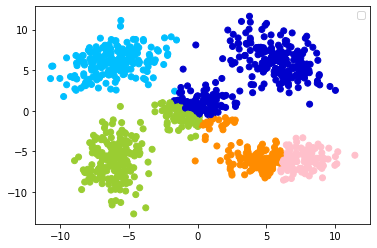

7.659839704081636
-4.723241561151084
-6.098954782828279
4.080554583892612
3.6836610390625
distance centroides [0.08175370751622292, 0.0016494362308029442, 0.0006662830083927564, 0.052986446939652355, 0.5891925651144605]


No handles with labels found to put in legend.


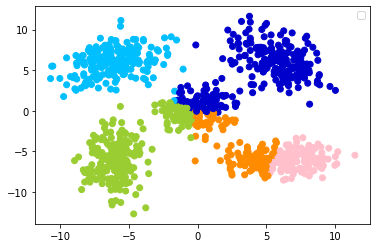

7.448859136363639
-4.876093355555559
-6.051712219999996
4.306234936395755
2.9662235547445257
distance centroides [0.04500007925378594, 0.029042024975162464, 0.0030561074112660626, 0.10061562754115132, 1.0752716072436932]


No handles with labels found to put in legend.


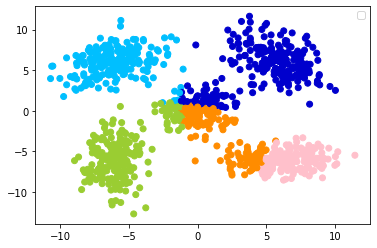

6.997861197080293
-5.389675108333336
-5.942918829268288
4.781952980314956
1.5611055731707315
distance centroides [0.20705776500025005, 0.5214194807859069, 0.022797841967302016, 0.4689999970277636, 4.769852315741086]


No handles with labels found to put in legend.


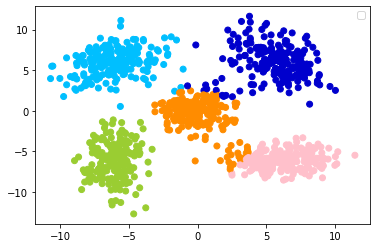

6.312388522222223
-6.079383605
-6.047074119402982
5.557513649532708
0.11377918536585374
distance centroides [0.46995283629700413, 1.4276678985964955, 0.01815191672375816, 1.1571536829275844, 6.197698114694234]


No handles with labels found to put in legend.


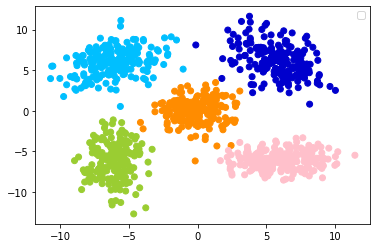

6.011466467005075
-6.099838949494949
-6.093397075376881
5.784431004926107
-0.10157777832512319
distance centroides [0.09237858519072832, 0.0023791739764494496, 0.0032905091669915847, 0.08751473991242872, 0.41245165286963364]


No handles with labels found to put in legend.


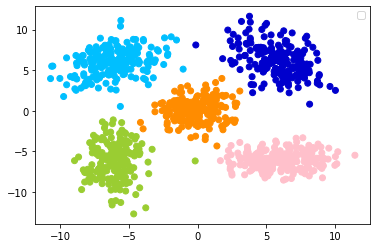

5.99343756060606
-6.070037296482412
-6.093397075376881
5.804299574257424
-0.10456307920792081
distance centroides [0.00040622865888148194, 0.000888297240071287, 0.0, 0.0005111647410279891, 0.005049427766103402]


No handles with labels found to put in legend.


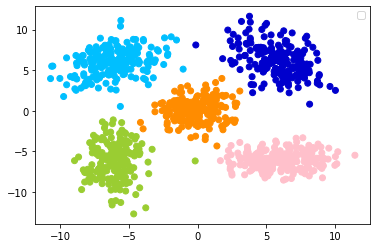

5.99343756060606
-6.070037296482412
-6.093397075376881
5.804299574257424
-0.10456307920792081
distance centroides [0.0, 0.0, 0.0, 0.0, 0.0]


,0,1,cluster
0,-6.315382,6.344938,3
1,-4.943573,7.821684,3
2,-8.920876,2.705258,3
3,-5.661533,7.425065,3
4,-5.918269,5.697313,3
...,...,...,...
995,-0.532394,-0.478236,5
996,-0.596780,-1.310213,5
997,0.645414,0.058871,5
998,0.679295,-1.391780,5


In [21]:
kmeans(5,"data1.txt")

No handles with labels found to put in legend.


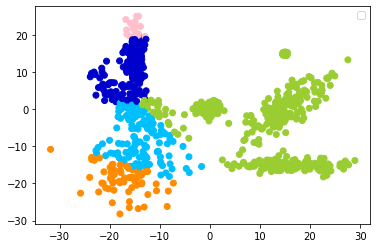

-14.993824136363633
10.547659817725746
-13.804940784722218
-16.126863712574856
-17.230240434782605
distance centroides [4.508752864303907, 123.51690247630007, 25.41140409773282, 16.405984558528584, 5.2792483643837524]


No handles with labels found to put in legend.


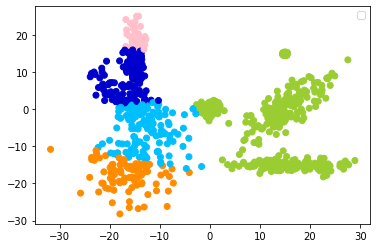

-14.746183882352941
11.544905347978903
-12.774808986111113
-16.371824167832173
-16.43656212903226
distance centroides [4.505802717924494, 0.9974101320597859, 5.830667108651632, 2.92512686609759, 1.7322126056296683]


No handles with labels found to put in legend.


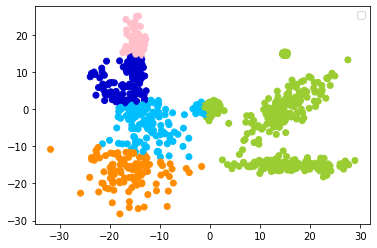

-14.812785363636369
11.92559583544303
-11.305806735714285
-16.787470930434782
-15.941267713043478
distance centroides [2.1640862979746154, 0.1449838966017225, 5.6884742920369735, 1.5698811796810654, 1.155214681340528]


No handles with labels found to put in legend.


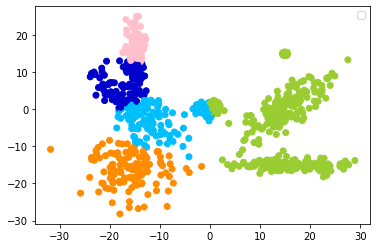

-14.828771054945062
13.236946217999991
-7.740731348314605
-17.136494254901958
-15.780079162790695
distance centroides [0.4754462990516741, 1.721605089567745, 14.914632157596827, 0.8276113829214807, 0.4902750747852442]


No handles with labels found to put in legend.


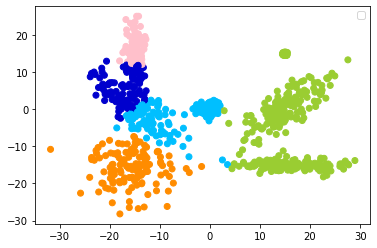

-14.862950320000007
15.333224049065407
-4.364012218340612
-17.164400141509432
-15.692609569343068
distance centroides [0.1860631319397842, 4.3944762440552925, 11.963629659413801, 1.7124827459892389, 0.1984264780231888]


No handles with labels found to put in legend.


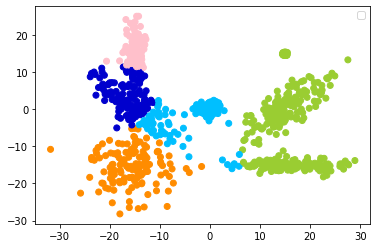

-14.938969594594598
15.511561638954857
-2.3229802189054722
-16.638545647999994
-15.61797505633803
distance centroides [0.26271925194423945, 0.06621743943431624, 4.247558308937704, 4.760413701854665, 0.11267143936769972]


No handles with labels found to put in legend.


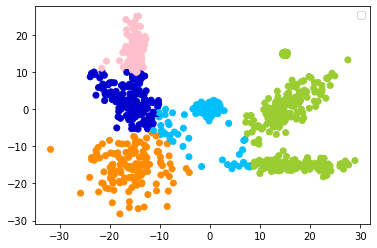

-15.032222408333336
15.712720810218965
-0.5459003262032086
-15.934364628571425
-15.588133929577465
distance centroides [0.1952791293014622, 0.15046549296645984, 3.395960392780548, 2.9391323166608117, 0.0011472636792464108]


No handles with labels found to put in legend.


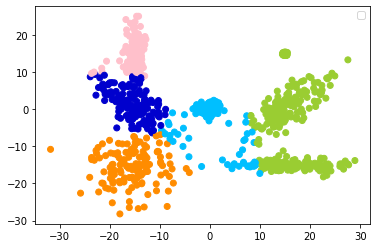

-15.199015890625006
15.9305497067669
0.41429614659685887
-15.475792120567377
-15.604305226950355
distance centroides [0.17804535517938413, 0.17200804500302708, 1.2084646715168115, 0.8006672858630366, 0.005230903839331311]


No handles with labels found to put in legend.


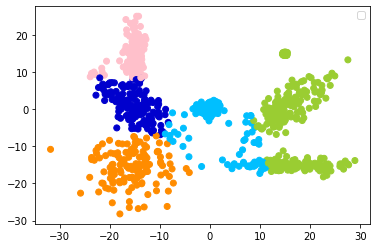

-15.359638656716418
16.22503050526315
1.4887716407766982
-15.114942028571422
-15.64473535
distance centroides [0.1133400549589127, 0.47694326419039457, 1.7470970738554523, 0.46198398996129963, 0.005460682588950957]


No handles with labels found to put in legend.


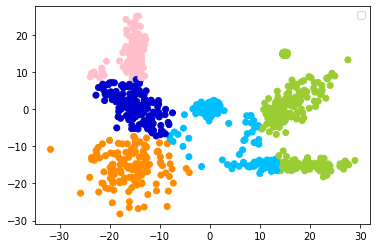

-15.39619889781022
16.50609939436619
2.7944789780701766
-14.896132900709212
-15.68000264028777
distance centroides [0.02391226497079057, 1.1918282801911078, 2.903910069811734, 0.14908433607369145, 0.0048979070650913975]


No handles with labels found to put in legend.


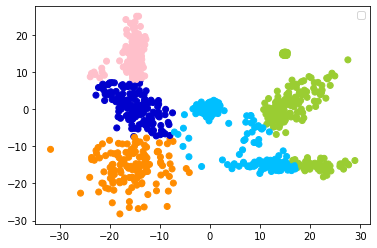

-15.38415326618705
16.694080523364473
4.48418044787645
-14.854481950354606
-15.569079914285716
distance centroides [0.010320320819278377, 3.158772336467129, 4.347679114972602, 0.04845418624246289, 0.014390078695600744]


No handles with labels found to put in legend.


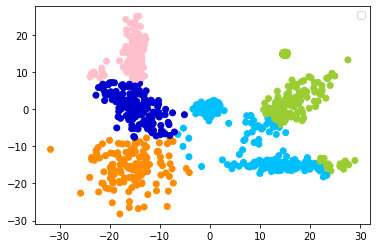

-15.374137128571428
16.344800307407407
6.88094032792208
-14.739856545454538
-15.572625057553958
distance centroides [0.0027511466228088066, 11.380573364635525, 7.4013914825941916, 0.040533397151041595, 0.003373817454050174]


No handles with labels found to put in legend.


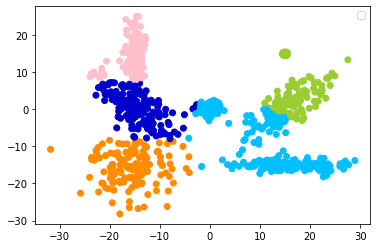

-15.374137128571428
15.997840008733622
8.477985807017541
-14.329526886666663
-15.492921870503599
distance centroides [0.0, 7.752401362746229, 2.5680774664828054, 0.20213008049706888, 0.008984772261207115]


No handles with labels found to put in legend.


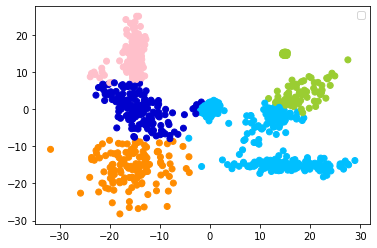

-15.436655985915495
16.092665645933014
8.992296478991591
-13.859108078431369
-15.492921870503599
distance centroides [0.015709135853520816, 1.1737021088737924, 0.32675086785986546, 0.22795826858736976, 0.0]


No handles with labels found to put in legend.


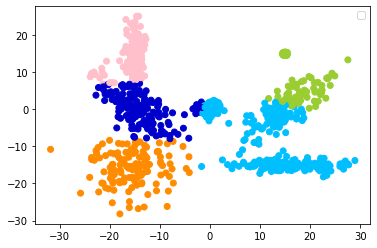

-15.503814750000004
16.09774293596059
9.235315512534815
-13.481306348387092
-15.492921870503599
distance centroides [0.016283402751617885, 0.1040051119640975, 0.06445813702184731, 0.16368810286335528, 0.0]


No handles with labels found to put in legend.


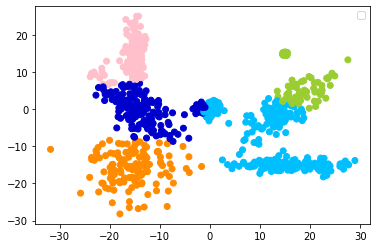

-15.570465335616444
16.131653688442206
9.530599583098587
-12.824920881987572
-15.451867611510794
distance centroides [0.016452916120118774, 0.04256425077769213, 0.08740653795360288, 0.4464897984853596, 0.004055592443326064]


No handles with labels found to put in legend.


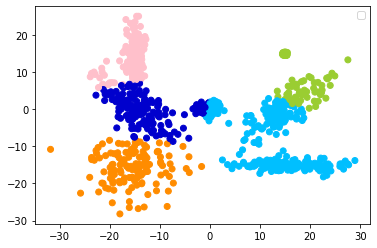

-15.666838684563764
16.150655326530607
10.128651244117645
-11.474142999999994
-15.451867611510794
distance centroides [0.03769765351394873, 0.02478089909858907, 0.435235556114772, 1.831997134070978, 0.0]


No handles with labels found to put in legend.


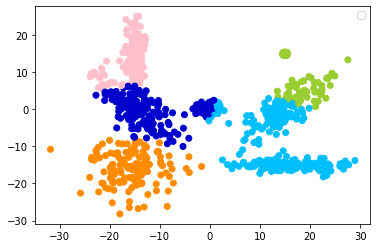

-15.70936979738563
16.13457108290155
12.571614471223018
-8.216744179916317
-15.57586472262774
distance centroides [0.045856274267544954, 0.029803631498287634, 8.515287573926031, 10.612394752874748, 0.023313691523239942]


No handles with labels found to put in legend.


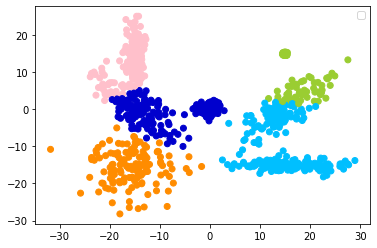

-16.00347286390534
16.050033757575758
14.666120658008651
-5.995073778625953
-15.591658392857147
distance centroides [0.8996389149770481, 0.07146800729633924, 7.536705235933556, 4.976825262089772, 0.03920980900868691]


No handles with labels found to put in legend.


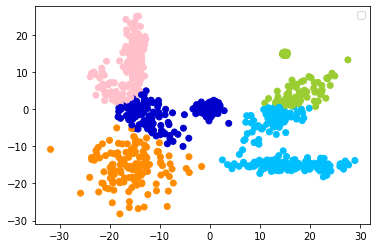

-16.07425994505496
16.023924330097085
14.689693112612607
-5.313388447580645
-15.571496485915496
distance centroides [0.5387714078004341, 0.18022966896365586, 0.20468368374024792, 0.4897885043116029, 0.017031622514367177]


No handles with labels found to put in legend.


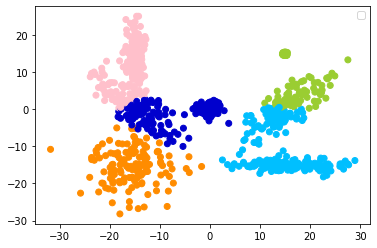

-16.055739546875014
16.023163014285714
14.665945183486233
-4.833259278481014
-15.567858069930073
distance centroides [0.2781052183621302, 0.04568927108864844, 0.04452920166949981, 0.244312344001564, 0.00528420820753838]


No handles with labels found to put in legend.


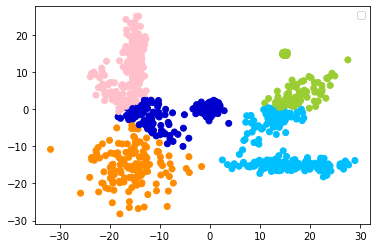

-16.0696195888325
16.001628561320754
14.674514018518513
-4.48899933478261
-15.560022344827589
distance centroides [0.08287288938313377, 0.011375278967334123, 0.011555487946449111, 0.11851592932703693, 0.021710185975629362]


No handles with labels found to put in legend.


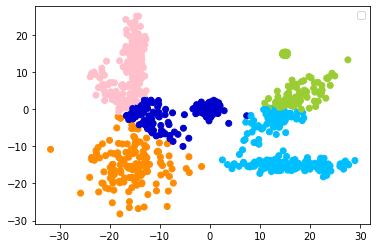

-16.07177383838385
15.99178494859813
14.706420605633795
-4.246224656387666
-15.546981175675677
distance centroides [0.003382032399016465, 0.0111565197962745, 0.023903094973370675, 0.06053347673332975, 0.04737412208703565]


No handles with labels found to put in legend.


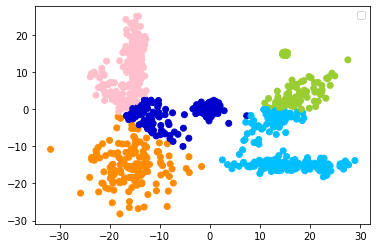

-16.07177383838385
15.973176562790696
14.719229278301881
-4.246224656387666
-15.546981175675677
distance centroides [0.0, 0.0030101443672058636, 0.003156634336464243, 0.0, 0.0]


No handles with labels found to put in legend.


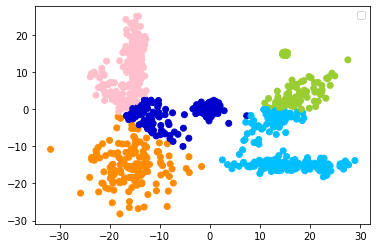

-16.07177383838385
15.973176562790696
14.719229278301881
-4.246224656387666
-15.546981175675677
distance centroides [0.0, 0.0, 0.0, 0.0, 0.0]


,0,1,cluster
0,-0.878755,0.486313,4
1,-0.221894,-0.109937,4
2,-1.005302,-1.402324,4
3,-0.141265,1.894775,4
4,-1.061511,-1.284591,4
...,...,...,...
995,-15.768583,-1.289119,4
996,-8.972010,-1.439961,4
997,-17.843235,0.551403,1
998,-9.824211,-4.338468,4


In [22]:
kmeans(5,"data2.txt")

No handles with labels found to put in legend.


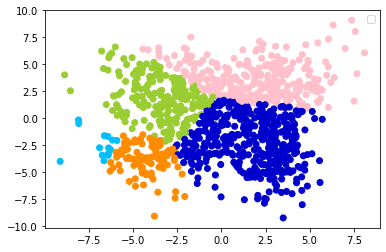

1.9640110851851849
-3.456198585714286
-6.876406214285714
1.6498320922330099
-4.181455904255316
distance centroides [1.8061912941628098, 2.5157493303237533, 0.3162418000263768, 2.3159374322583153, 2.9065505248135564]


No handles with labels found to put in legend.


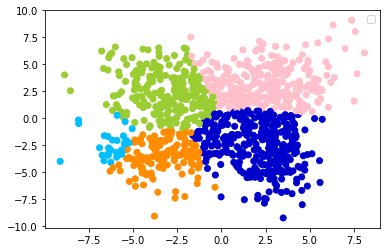

2.451457933333333
-3.1320638589211613
-6.2146662758620685
2.0597071351351355
-3.2900617007874
distance centroides [0.4326337729418347, 0.37274485866712553, 0.4451381777357386, 0.2622690640439896, 0.8304693442190598]


No handles with labels found to put in legend.


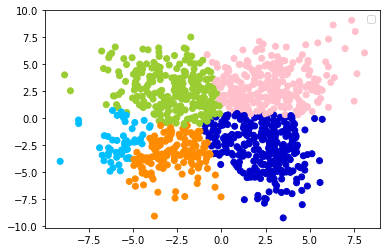

2.717670610687023
-2.7948394218750003
-5.753989019230767
2.324833261168385
-2.7265056690647462
distance centroides [0.1049473386336427, 0.154933103140042, 0.2453684719468811, 0.10892464707802998, 0.35439199095546225]


No handles with labels found to put in legend.


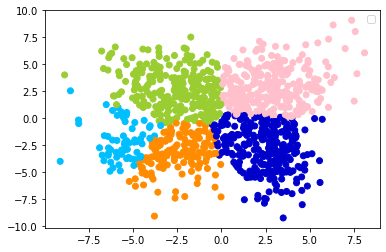

2.879637195312501
-2.5974055643939393
-5.621317415384614
2.4868104082397005
-2.3998596621621613
distance centroides [0.03546422152701262, 0.04523825985372398, 0.03080259604834842, 0.04857919299894024, 0.14260458228580186]


No handles with labels found to put in legend.


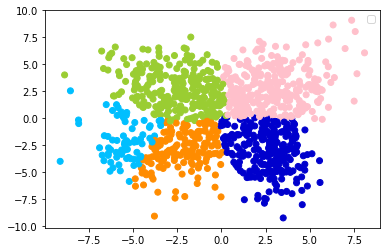

2.9292469083969483
-2.5219504182509502
-5.508388611111111
2.5921341795918362
-2.201095278481011
distance centroides [0.014227622592508229, 0.009373255906297133, 0.012862845484825376, 0.04974700207217687, 0.07612279398592285]


No handles with labels found to put in legend.


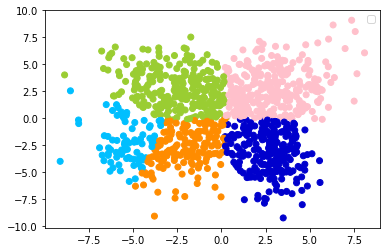

2.9289925283018885
-2.500703007604563
-5.392900962499999
2.6947450043103447
-1.9835082687499987
distance centroides [0.0034104317791541347, 0.0013391652558616845, 0.048005631581240646, 0.029633535684097254, 0.08048323333497095]


No handles with labels found to put in legend.


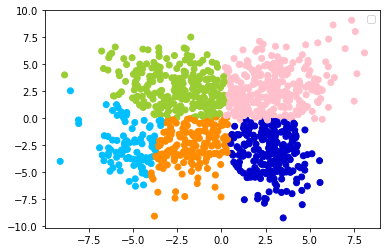

2.92369366292135
-2.53444773540856
-5.24679036263736
2.7849821711711717
-1.6883171104294477
distance centroides [0.0005255787717608194, 0.0053337849310722595, 0.09116487447402044, 0.01410219904825923, 0.15751878740019265]


No handles with labels found to put in legend.


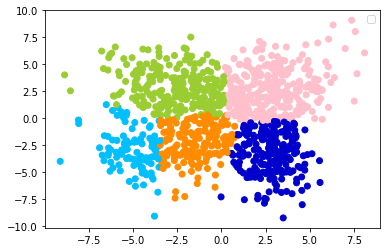

2.9260006133829006
-2.6319494919999995
-5.0402548599999974
2.8190996481481485
-1.4492197575757582
distance centroides [0.0005658152118655713, 0.017231520786476523, 0.17690666302005825, 0.009703950100345839, 0.20649607281379012]


No handles with labels found to put in legend.


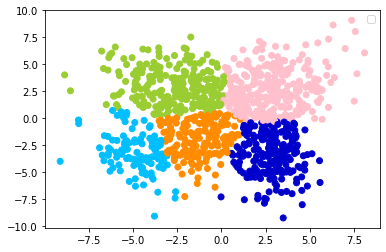

2.9268118148148163
-2.737421421487603
-4.8299881559633
2.8439509194312795
-1.229181970238096
distance centroides [3.106530945131986e-05, 0.01672488441511808, 0.1015002633891052, 0.003672969864104886, 0.15481881917916956]


No handles with labels found to put in legend.


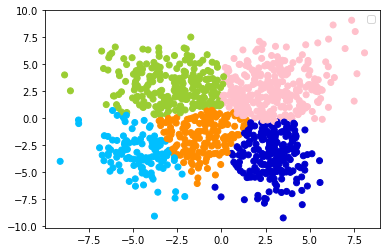

2.923831092936805
-2.8135528870292883
-4.639346914529913
2.8437192238095235
-1.0518988000000002
distance centroides [0.0011406904334703202, 0.005834966060087478, 0.05309989205830341, 0.0015446106363828922, 0.09250000286471532]


No handles with labels found to put in legend.


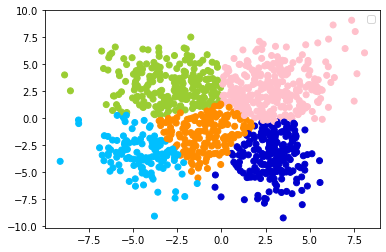

2.9342907415730357
-2.912729034482758
-4.483597233870967
2.872418249999999
-0.8255733410404628
distance centroides [0.0015965840593418225, 0.011059116859897246, 0.02746031717029018, 0.009912104157894444, 0.13460180960819043]


No handles with labels found to put in legend.


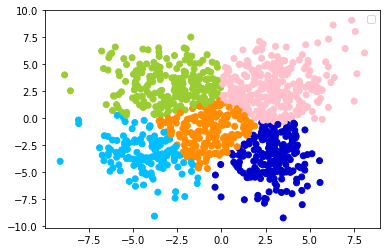

2.969421684210528
-2.9877028008849553
-4.326672151515151
2.880592727272725
-0.6685191067415733
distance centroides [0.0012619498688797902, 0.007650602503253994, 0.025383131488008404, 0.008510448645860206, 0.09208511678373853]


No handles with labels found to put in legend.


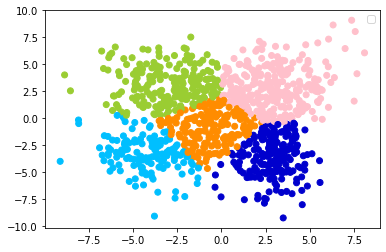

3.00158598854962
-3.043197377272726
-4.195598199999999
2.883619517766496
-0.5674907900552488
distance centroides [0.00181252218964817, 0.005250097147325588, 0.01723202326906333, 0.0002773295846099719, 0.06156602418809318]


No handles with labels found to put in legend.


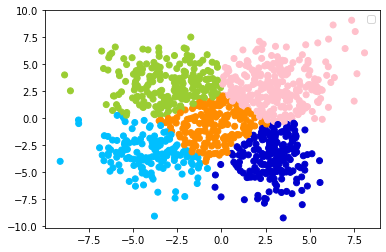

3.0610900157480336
-3.0670213548387086
-4.05358644966443
2.875164116751267
-0.43448420765027346
distance centroides [0.007001461486087615, 0.001172264391321347, 0.02039128908538148, 0.00018547197457510585, 0.07492673967053476]


No handles with labels found to put in legend.


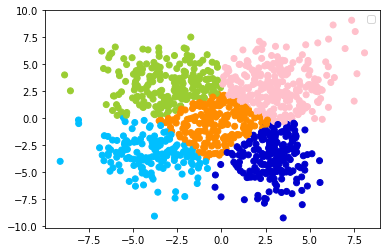

3.135851584362142
-3.1369630566037725
-3.976092269736843
2.865079492385785
-0.3170654693877552
distance centroides [0.01355925392535276, 0.005728358539156531, 0.0063332410000652255, 0.00022933045951446012, 0.062056844225748774]


No handles with labels found to put in legend.


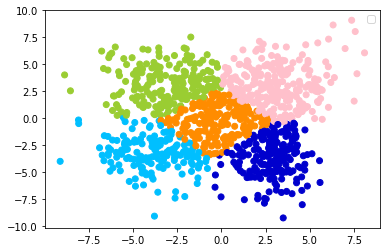

3.187219876595746
-3.1866269903846143
-3.8902425471698123
2.8533409191919175
-0.18852812
distance centroides [0.0073118772285189594, 0.002820749908652126, 0.010234718240006675, 0.0001526339378998053, 0.04952395375071048]


No handles with labels found to put in legend.


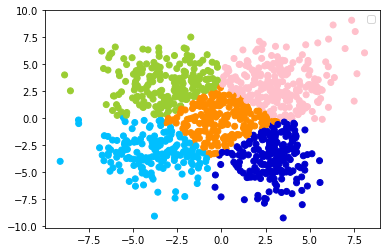

3.239411273542603
-3.2220365365853647
-3.8289848848484858
2.8414067939698473
-0.003091826923076894
distance centroides [0.02048345524261109, 0.0014619793906992522, 0.007116244326622202, 0.0001490407374137407, 0.05380924334868176]


No handles with labels found to put in legend.


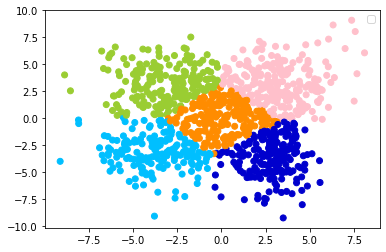

3.293369990697675
-3.2355472843137236
-3.769958947058824
2.8128756249999975
0.11933916587677713
distance centroides [0.008049134663780102, 0.0001900927579842561, 0.0050004738497230776, 0.0008869359754066359, 0.032778451316117806]


No handles with labels found to put in legend.


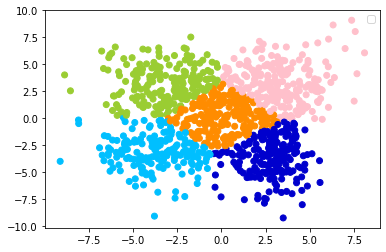

3.3556474375000005
-3.249195847290639
-3.727629554913296
2.796761686567162
0.18245801860465116
distance centroides [0.006275535737640671, 0.00019194868965644683, 0.0020698899414851534, 0.00026359184630912015, 0.017840938326263184]


No handles with labels found to put in legend.


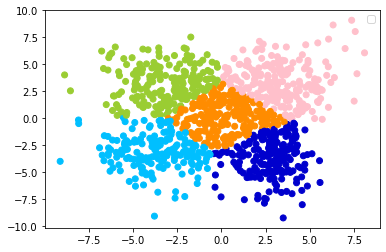

3.373147460784314
-3.249195847290639
-3.7228552701149433
2.7909170854271337
0.26697528181818186
distance centroides [0.002460242559948295, 0.0, 0.00030770374335625285, 0.0010820061976056815, 0.007252130193560657]


No handles with labels found to put in legend.


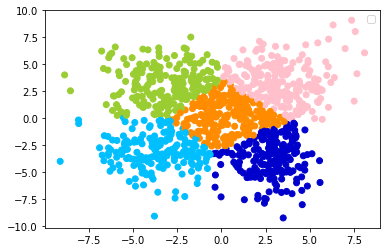

3.4155764
-3.243207541463413
-3.7011694204545464
2.7958468080808054
0.3369049140271495
distance centroides [0.002273306801366878, 0.000783837821776477, 0.0008701695804926536, 0.00014190906679256406, 0.0066918377221668515]


No handles with labels found to put in legend.


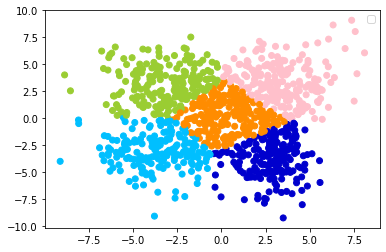

3.439894116161616
-3.243207541463413
-3.674039575418995
2.8004102193877523
0.3937691981981983
distance centroides [0.0006559230941347381, 0.0, 0.002022160850929079, 0.0006600623664496121, 0.0038526067873816956]


No handles with labels found to put in legend.


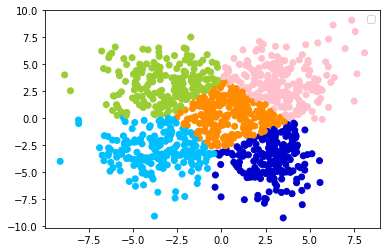

3.444808345177665
-3.2443979607843123
-3.622226891304349
2.816956046153843
0.43317649545454534
distance centroides [0.00014249109392330974, 0.00024887921574800917, 0.004822429155780432, 0.00027945385086283964, 0.0021925215217107295]


No handles with labels found to put in legend.


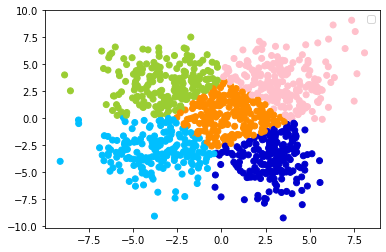

3.4613227692307693
-3.2443979607843123
-3.609396308108108
2.8037617806122417
0.45448100909090894
distance centroides [0.0005058274188097969, 0.0, 0.0002079857705786854, 0.00021061358696458575, 0.0018699098061200385]


No handles with labels found to put in legend.


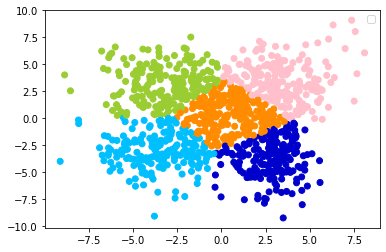

3.4762620207253887
-3.25868193596059
-3.609396308108108
2.8037617806122417
0.46493471300448425
distance centroides [0.0005126102821850434, 0.00020443002939964094, 0.0, 0.0, 0.0007658855357175679]


No handles with labels found to put in legend.


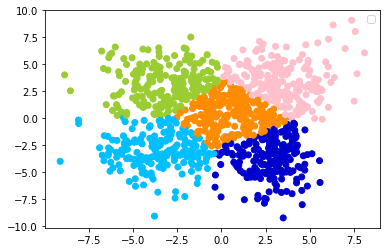

3.490848078534032
-3.25868193596059
-3.609396308108108
2.792249934010149
0.47906741071428555
distance centroides [0.0005266614597328217, 0.0, 0.0, 0.0001835883971636185, 0.0008046603228718369]


No handles with labels found to put in legend.


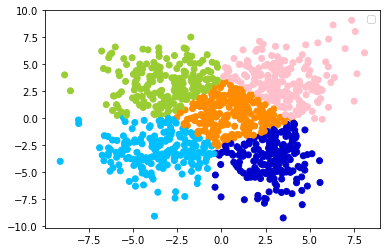

3.513609207446808
-3.2731246633663353
-3.566870712765957
2.792249934010149
0.5155407911111112
distance centroides [0.0012031176322580058, 0.00020868674043087544, 0.00204533641996627, 0.0, 0.005523167331802105]


No handles with labels found to put in legend.


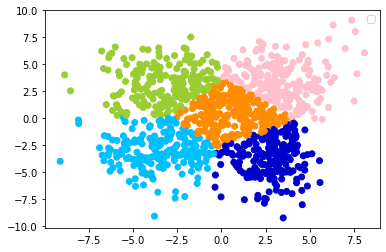

3.510514833333333
-3.286883517412934
-3.566870712765957
2.7873134797979766
0.534260013215859
distance centroides [0.001278249470547143, 0.00019075264542947756, 0.0, 0.00014476582509831423, 0.0006666491700298269]


No handles with labels found to put in legend.


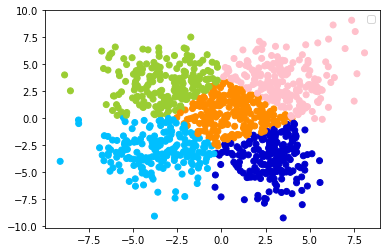

3.518148951351351
-3.286883517412934
-3.559144253968254
2.7742008592964793
0.5544420088495575
distance centroides [0.00013440252937540155, 0.0, 0.0002258675411845751, 0.00021321123072980572, 0.0009844616547875233]


No handles with labels found to put in legend.


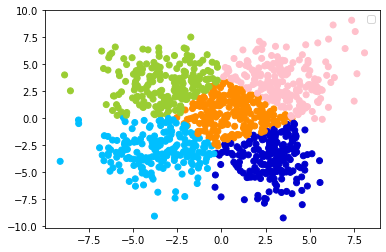

3.518148951351351
-3.282126782178216
-3.550905010526316
2.7742008592964793
0.5786768080357144
distance centroides [0.0, 0.00020272601919862874, 0.00021614894953581994, 0.0, 0.0006144451492884538]


No handles with labels found to put in legend.


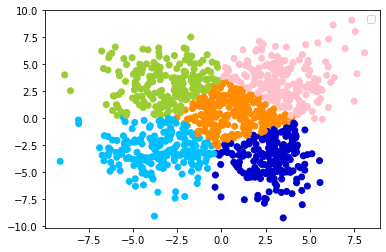

3.51561441847826
-3.282126782178216
-3.550905010526316
2.769442333333331
0.6076305176991152
distance centroides [0.00034672821472938545, 0.0, 0.0, 0.0002800015931880669, 0.00087468069802769]


No handles with labels found to put in legend.


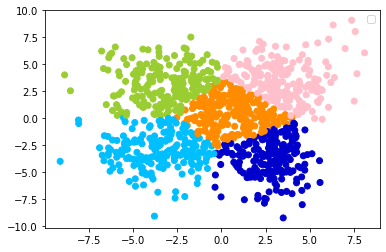

3.51561441847826
-3.282126782178216
-3.550905010526316
2.774288071065987
0.6129485859030838
distance centroides [0.0, 0.0, 0.0, 0.0001449522352483928, 0.0001091211319838917]


,0,1,cluster
0,1.528244,2.710130,1
1,2.120208,4.661918,1
2,-2.807022,3.736396,2
3,-3.447223,0.280401,2
4,0.306181,0.054788,5
...,...,...,...
995,1.308213,-1.398988,5
996,2.859350,-3.123303,4
997,1.590705,-2.159328,4
998,2.800969,-2.143636,4


In [23]:
kmeans(5,"data3.txt")

# Les points de départs jouent un rôle trés important dans la vitesse de convergence et le nombre d'itérations de l'algorithme pour l'obtention des clusters finaux

# Ci-aprés , j'utilise la fonction kmeans de python 

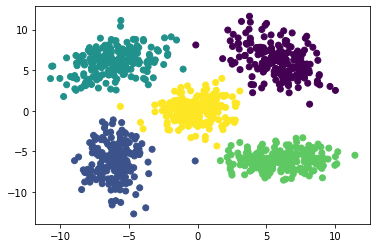

In [17]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X1)
#print(kmeans.labels_)
#print(kmeans.cluster_centers_)
pred = kmeans.predict(X1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X1[:,0], X1[:,1], c=pred)
plt.show()


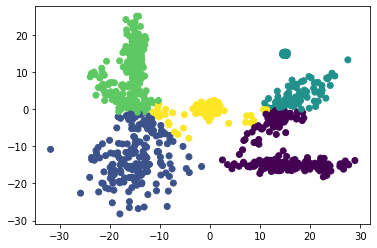

In [18]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X2)
#print(kmeans.labels_)
#print(kmeans.cluster_centers_)
pred = kmeans.predict(X2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X2[:,0], X2[:,1], c=pred)
plt.show()

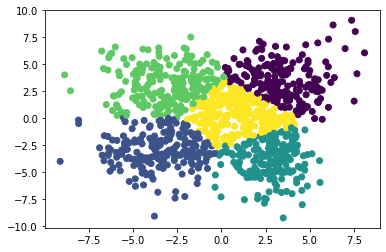

In [19]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X3)
#print(kmeans.labels_)
#print(kmeans.cluster_centers_)
pred = kmeans.predict(X3)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X3[:,0], X3[:,1], c=pred)
plt.show()

# On constate que les résultats des clusters obtenus à partir de la méthode kmeans obtenu à partir de python et celle qu'on a développé from scratch sont presque les mêmes à quelques observations prêts